For the NYPD data set I want to look into the crime for Male and Females.
my question is who has the heighest crime rate?

In [264]:
#import libararies
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn


In [ ]:
from google.colab import drive

In [ ]:
# allowed google colab to access google drive.

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#looking for the path of the dataset by copyinig path from the google drive folder
path='/content/drive/MyDrive/Dataset/NYPD_data_set.csv'
df=pd.read_csv(path)

In [ ]:
#tkaing a look at the dataset
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,K,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,K,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,K,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,K,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170090,270955727,07/07/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,F,B,52,0,25-44,M,BLACK,1017273,255924,40.869067,-73.880600,POINT (-73.8806 40.869067)
170091,273117887,08/18/2023,681,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,B,47,0,25-44,F,BLACK,1026480,262584,40.887314,-73.847272,POINT (-73.8472717577564 40.8873136344706)
170092,274301006,09/13/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,S,122,0,25-44,M,WHITE HISPANIC,951857,161569,40.610087,-74.116666,POINT (-74.11666648991874 40.6100867091453)
170093,269912233,06/15/2023,490,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,M,K,62,0,25-44,M,BLACK,983469,157947,40.600204,-74.002812,POINT (-74.00281242 40.60020423)


In [ ]:
#need to make dictonary key to understand what the columns mean. have to also figure out what this columns are called
df_columns_list=df.columns
print(df_columns_list)


Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')


In [ ]:
column_key={'ARREST_KEY': 'Inmate Identification',
             'ARREST_DATE': 'When Arrest Happened',
             'PD_CD': 'Three digit internal classification code',
             'PD_DESC': 'Type of Crime',
             'KY_CD': 'Three digit internal classification code',
             'OFNS_DESC': 'Description of internal classification corresponding with KY code',
             'LAW_CODE': 'Law code charges corresponding to the NYS Penal Law, VTL and other various local laws',
             'LAW_CAT_CD': 'Level of offense: felony, misdemeanor, violation',
             'ARREST_BORO': 'Borough of arrest. B(Bronx), S(Staten Island), K(Brooklyn), M(Manhattan), Q(Queens)',
             'ARREST_PRECINCT':'Precinct where the arrest occurred',
             'JURISDICTION_CODE': 'Jurisdiction responsible for arrest0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions',
             'AGE_GROUP': 'Perpetrator’s age within a category',
             'PERP_SEX': 'Perpetrator’s sex description',
             'X_COORD_CD':  'Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)',
             'Y_COORD_CD': 'Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)',
             'Latitude': 'Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)',
             'New Georeferenced Column':  'unknown'}

In [ ]:
#testing out the key
column_key.get('LAW_CODE')

'Law code charges corresponding to the NYS Penal Law, VTL and other various local laws'

In [ ]:
#lookinf for the all the values in the column. There should only be M,F, or V.
#going to mark 9,I, into the other category
df['LAW_CAT_CD'].value_counts()

M        93347
F        73866
Other     1257
V          973
9          459
I          193
Name: LAW_CAT_CD, dtype: int64

In [ ]:
# change the F to FELONY, M to misdemeanor, V to violation in the LAW_CAT_CD category so it is not mistaken for male or female.
df['LAW_CAT_CD'] = df['LAW_CAT_CD'].replace('F','FELONY')
df['LAW_CAT_CD'] = df['LAW_CAT_CD'].replace('M','MISDEAMENOR')
df['LAW_CAT_CD'] = df['LAW_CAT_CD'].replace('V','VIOLATION')
df['LAW_CAT_CD'] = df['LAW_CAT_CD'].replace('9','Other')
df['LAW_CAT_CD'] = df['LAW_CAT_CD'].replace('I','Other')




In [196]:
#checking it worked
df['LAW_CAT_CD'].value_counts()

MISDEAMENOR    93347
FELONY         73866
Other           1909
VIOLATION        973
Name: LAW_CAT_CD, dtype: int64

In [ ]:
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,FELONY,BROOKLYN,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,FELONY,BROOKLYN,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,FELONY,BROOKLYN,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,FELONY,MANHATTAN,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,FELONY,BROOKLYN,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170090,270955727,07/07/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,FELONY,BRONX,52,0,25-44,M,BLACK,1017273,255924,40.869067,-73.880600,POINT (-73.8806 40.869067)
170091,273117887,08/18/2023,681,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,MISDEAMENOR,BRONX,47,0,25-44,F,BLACK,1026480,262584,40.887314,-73.847272,POINT (-73.8472717577564 40.8873136344706)
170092,274301006,09/13/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,MISDEAMENOR,STATAN ISLAND,122,0,25-44,M,WHITE HISPANIC,951857,161569,40.610087,-74.116666,POINT (-74.11666648991874 40.6100867091453)
170093,269912233,06/15/2023,490,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,MISDEAMENOR,BROOKLYN,62,0,25-44,M,BLACK,983469,157947,40.600204,-74.002812,POINT (-74.00281242 40.60020423)


In [ ]:
# change the arrest boro to full name
df['ARREST_BORO'] = df['ARREST_BORO'].replace('K','BROOKLYN')
df['ARREST_BORO'] = df['ARREST_BORO'].replace('M','MANHATTAN')
df['ARREST_BORO'] = df['ARREST_BORO'].replace('S','STATAN ISLAND')
df['ARREST_BORO'] = df['ARREST_BORO'].replace('Q','QUEENS')
df['ARREST_BORO'] = df['ARREST_BORO'].replace('B','BRONX')


In [ ]:
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,FELONY,BROOKLYN,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,FELONY,BROOKLYN,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,FELONY,BROOKLYN,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,FELONY,MANHATTAN,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,FELONY,BROOKLYN,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170090,270955727,07/07/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,FELONY,BRONX,52,0,25-44,M,BLACK,1017273,255924,40.869067,-73.880600,POINT (-73.8806 40.869067)
170091,273117887,08/18/2023,681,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,MISDEAMENOR,BRONX,47,0,25-44,F,BLACK,1026480,262584,40.887314,-73.847272,POINT (-73.8472717577564 40.8873136344706)
170092,274301006,09/13/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,MISDEAMENOR,STATAN ISLAND,122,0,25-44,M,WHITE HISPANIC,951857,161569,40.610087,-74.116666,POINT (-74.11666648991874 40.6100867091453)
170093,269912233,06/15/2023,490,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,MISDEAMENOR,BROOKLYN,62,0,25-44,M,BLACK,983469,157947,40.600204,-74.002812,POINT (-74.00281242 40.60020423)


In [ ]:
df

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,BROOKLYN,77,0,45-64,F,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
1,262984267,02/03/2023,515,"CONTROLLED SUBSTANCE,SALE 3",117.0,DANGEROUS DRUGS,PL 2203901,F,BROOKLYN,73,0,25-44,M,BLACK,1009318,178259,40.655923,-73.909650,POINT (-73.90965 40.655923)
2,263664549,02/15/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,BROOKLYN,62,0,25-44,M,WHITE,982272,158771,40.602468,-74.007120,POINT (-74.00712 40.602468)
3,261345231,01/04/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,MANHATTAN,32,0,25-44,M,BLACK,999899,238684,40.821797,-73.943457,POINT (-73.943457 40.821797)
4,263536618,02/13/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 12005WX,F,BROOKLYN,71,0,25-44,M,BLACK,1001437,183080,40.669175,-73.938042,POINT (-73.938042 40.669175)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170090,270955727,07/07/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601002,F,BRONX,52,0,25-44,M,BLACK,1017273,255924,40.869067,-73.880600,POINT (-73.8806 40.869067)
170091,273117887,08/18/2023,681,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,M,BRONX,47,0,25-44,F,BLACK,1026480,262584,40.887314,-73.847272,POINT (-73.8472717577564 40.8873136344706)
170092,274301006,09/13/2023,969,"TRAFFIC,UNCLASSIFIED INFRACTIO",881.0,OTHER TRAFFIC INFRACTION,VTL051101A,M,STATAN ISLAND,122,0,25-44,M,WHITE HISPANIC,951857,161569,40.610087,-74.116666,POINT (-74.11666648991874 40.6100867091453)
170093,269912233,06/15/2023,490,"STOLEN PROPERTY 3,POSSESSION",232.0,POSSESSION OF STOLEN PROPERTY,PL 1654000,M,BROOKLYN,62,0,25-44,M,BLACK,983469,157947,40.600204,-74.002812,POINT (-74.00281242 40.60020423)


In [ ]:
#locating miss data
df.isnull()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170090,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
170091,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
170092,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
170093,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Locating where the miss data is in the data set
df.isnull().sum()

ARREST_KEY                     0
ARREST_DATE                    0
PD_CD                          0
PD_DESC                        0
KY_CD                         13
OFNS_DESC                      0
LAW_CODE                       0
LAW_CAT_CD                  1257
ARREST_BORO                    0
ARREST_PRECINCT                0
JURISDICTION_CODE              0
AGE_GROUP                      0
PERP_SEX                       0
PERP_RACE                      0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                       0
Longitude                      0
New Georeferenced Column       0
dtype: int64

In [ ]:
# Filling in missing value for the LAW_CAT_CD
df = df.fillna({'LAW_CAT_CD': 'Other'})


In [ ]:
# look at the number of crimes there are all together
df['PD_DESC'].count(),

(170095,)

In [ ]:
#looking for where all the null are located in the data set
df.isnull().sum()


ARREST_KEY                   0
ARREST_DATE                  0
PD_CD                        0
PD_DESC                      0
KY_CD                       13
OFNS_DESC                    0
LAW_CODE                     0
LAW_CAT_CD                   0
ARREST_BORO                  0
ARREST_PRECINCT              0
JURISDICTION_CODE            0
AGE_GROUP                    0
PERP_SEX                     0
PERP_RACE                    0
X_COORD_CD                   0
Y_COORD_CD                   0
Latitude                     0
Longitude                    0
New Georeferenced Column     0
dtype: int64

In [ ]:
#looking at the number of female and male then changing the name to better understand.
df['PERP_SEX'].value_counts()

M    137574
F     29018
U      3503
Name: PERP_SEX, dtype: int64

In [ ]:
df['PERP_SEX'] = df['PERP_SEX'].replace('M', 'MALE')
df['PERP_SEX'] = df['PERP_SEX'].replace('F', 'FEMALE')
df['PERP_SEX'] = df['PERP_SEX'].replace('U', 'UNKNOWN')


In [ ]:
df['PERP_SEX'].value_counts()

MALE       137574
FEMALE      29018
UNKNOWN      3503
Name: PERP_SEX, dtype: int64

In [200]:
#splittin all the gender
Gender= df.groupby(['PERP_SEX'])

In [241]:
Gender.get_group('FEMALE')

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,261209118,01/01/2023,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,FELONY,BROOKLYN,77,0,45-64,FEMALE,BLACK,999335,186085,40.677426,-73.945615,POINT (-73.945615 40.677426)
5,262030390,01/17/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,FELONY,QUEENS,113,0,45-64,FEMALE,BLACK,1040264,190275,40.688762,-73.798020,POINT (-73.79802 40.688762)
12,263347526,02/09/2023,397,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1600500,FELONY,BRONX,43,0,25-44,FEMALE,BLACK,1022949,244176,40.836798,-73.860143,POINT (-73.860143 40.836798)
24,268490661,05/18/2023,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,FELONY,MANHATTAN,5,0,25-44,FEMALE,WHITE,986544,201452,40.719617,-73.991722,POINT (-73.991722 40.719617)
27,267152152,04/23/2023,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,MISDEAMENOR,BROOKLYN,60,0,25-44,FEMALE,WHITE,981028,149444,40.576866,-74.011596,POINT (-74.011596 40.576866)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170071,270018875,06/18/2023,681,"CHILD, ENDANGERING WELFARE",233.0,SEX CRIMES,PL 2601001,MISDEAMENOR,BROOKLYN,75,0,25-44,FEMALE,BLACK,1017036,183890,40.671360,-73.881811,POINT (-73.8818110231735 40.6713598203364)
170072,269118436,05/31/2023,259,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",351.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450001,MISDEAMENOR,BRONX,43,0,<18,FEMALE,BLACK,1023763,234869,40.811251,-73.857259,POINT (-73.857259 40.811251)
170074,274572309,09/17/2023,511,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,MISDEAMENOR,MANHATTAN,25,0,45-64,FEMALE,BLACK,1001487,232707,40.805388,-73.937736,POINT (-73.937736 40.805388)
170083,271325133,07/14/2023,705,"FORGERY,ETC.-MISD.",358.0,OFFENSES INVOLVING FRAUD,PL 1702000,MISDEAMENOR,MANHATTAN,28,0,18-24,FEMALE,WHITE HISPANIC,999788,233328,40.807094,-73.943873,POINT (-73.943873 40.807094)


In [250]:
#creating a filter
filt=df['PERP_SEX']== 'FEMALE'
df_FEMALE=df.loc[filt]['LAW_CAT_CD'].value_counts()

In [251]:
df_FEMALE

MISDEAMENOR    17400
FELONY         11361
Other            185
VIOLATION         72
Name: LAW_CAT_CD, dtype: int64

In [248]:
filt=df['PERP_SEX']== 'MALE'
df_MALE=df.loc[filt]['LAW_CAT_CD'].value_counts()

In [249]:
df_MALE


MISDEAMENOR    73716
FELONY         61278
Other           1701
VIOLATION        879
Name: LAW_CAT_CD, dtype: int64

Text(0.5, 1.0, 'Level of Crime')

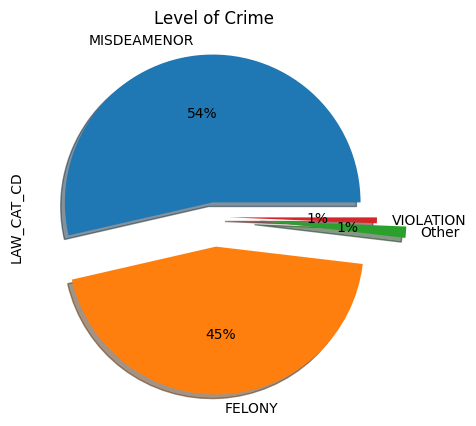

In [252]:
df_MALE.plot.pie(autopct='%1.f%%', shadow=True, explode=(0.1, 0.2, 0.3, 0.1,))
plt.title('Types of Crime for MALE')


Text(0.5, 1.0, 'Types of Crime for FEMALE')

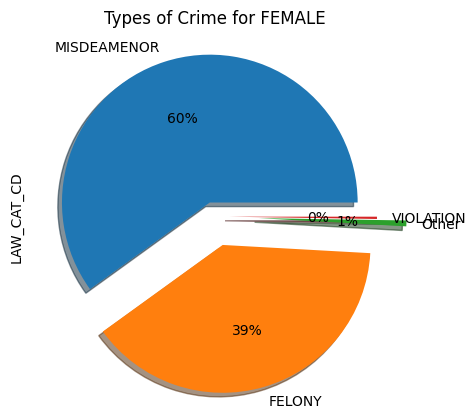

In [254]:
df_FEMALE.plot.pie(autopct='%1.f%%', shadow=True, explode=(0.1, 0.2, 0.3, 0.1,))
plt.title('Types of Crime for FEMALE')

It  looks like the crime rate for Male in NYC is higher
Felony for males is 45%  compared to felonies for females 39% but it comes to Misdeamnors women in nyc have a higher rate.  
male misdeamnor is 54% and women is 60%.